# Xpand IT DS Challenge

This notebook contains the template you should use to present your code, results and conclusions. You should keep the main structure intact to make it easier to evaluate and compare in the end.

## Dataset
You can find the dataset in the data folder of the repository. The folder contains two files:
* dow_jones_index.data - dataset data
* dow_jones_index.names - dataset information and details

### Data Importation

## Business Analysis
Here you should conduct a brief analysis of what is Dow Jones Index. You can enumerate the main topics to take into account based on the dataset provided as well as your understandings of the variables.


-----
*Add here your business analysis conclusions (max. 200 words)*

-----


Project Goal: 
- Predict what will be the best company to invest each week. 
- This can be translated into determining which stock will produce the greatest rate of return in the following week.
- Dependent variable (y): percent_change_next_weeks_price -> I intend to predict the stock that will have the highest percent_change_next_weeks_price.

Multivariate time series composed by several stocks (30 in total).

[Key Words]:
 - Time Series
 - Stock Prices
 - Prediction
 - LSTMs (Long Short Term Memory) - often refered in the literature
 - ARIMA / SARIMA (Auto Regressive Integrated Moving Average) / (Seasonal Auto Regressive Integrated Moving Average) - Baseline method

References:
1. https://archive.ics.uci.edu/dataset/312/dow+jones+index
2. https://www.semanticscholar.org/paper/Dynamic-Radius-Species-Conserving-Genetic-Algorithm-Brown-Pelosi/24d692e537b28b1fd13a18c0c93f0df6ef4e2047
3. https://neptune.ai/blog/predicting-stock-prices-using-machine-learning
4. https://www.researchgate.net/publication/268513448_Weekly_Dow_Jones_Index_Data

Other resources:
5. https://rpubs.com/AbhaJha/984077

## Data Understanding
During the data understanding phase, you should focus on understanding what each variable represents, compute statistics and visualizations. Some questions that may guide your work follow:
* Feature engineering: should new features be created from the existing ones?
* What will be your features and your label?
* Is the dataset ready for the prediction task? (ex: missing values)
* How will the data be split into train and test sets?

-----

In [60]:
#Libraries

import pandas as pd
import os
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from itertools import combinations

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
path = os.getcwd()
print(path)

c:\Users\Carolina\Desktop\CV\Python_challenges\DSU-Recruitment-Challenges


In [3]:
#add here your imports

# Read and close the file with with open()
with open(path +'\\data\\dow_jones_index.data','r') as data_file:
    # Define the column names (given by the 1st row of the data_file) 
    column_names = data_file.readline().strip().split(',')

    #Self-note: Once the first row is already been read and processed to obtain the column names, no need to do next(data_file), or it would skip the 1st row of values.

    # Create a nested array to store each row values 
    data_values = [row.strip().split(',') for row in data_file]
    
# Create a dataframe with the data
df = pd.DataFrame(data_values, columns=column_names)
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,,,$16.71,$15.97,-4.42849,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223028,239655616,$16.19,$15.79,-2.47066,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.02495926,242963398,$15.87,$16.13,1.63831,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500109,138428495,$16.18,$17.14,5.93325,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987451735,151379173,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.35571346,86758820,$83.28,$81.18,-2.52161,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.2210316,68230855,$80.93,$79.78,-1.42098,68,0.57896
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.50851907,78616295,$80.00,$79.02,-1.225,61,0.58912
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.225,8.8119524,92380844,$78.65,$76.78,-2.37762,54,0.594786


In [4]:
#add here your data understanting code

## Initial dataset inspection
 - General Information
 - Missing values

#### General Info

In [5]:
#Print information relative to df
df.info() # all variables are object Stype, i.e., str 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   quarter                             750 non-null    object
 1   stock                               750 non-null    object
 2   date                                750 non-null    object
 3   open                                750 non-null    object
 4   high                                750 non-null    object
 5   low                                 750 non-null    object
 6   close                               750 non-null    object
 7   volume                              750 non-null    object
 8   percent_change_price                750 non-null    object
 9   percent_change_volume_over_last_wk  750 non-null    object
 10  previous_weeks_volume               750 non-null    object
 11  next_weeks_open                     750 non-null    object

In [6]:
#Remove the $ sign from the data cells -> this is insufficient to convert str to numerical feature
df = df.applymap(lambda x: x.replace('$', '') if isinstance(x, str) else x)
df

C:\Users\Carolina\AppData\Local\Temp\ipykernel_21740\3616501523.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('$', '') if isinstance(x, str) else x)


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,,,16.71,15.97,-4.42849,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223028,239655616,16.19,15.79,-2.47066,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.02495926,242963398,15.87,16.13,1.63831,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500109,138428495,16.18,17.14,5.93325,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987451735,151379173,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.35571346,86758820,83.28,81.18,-2.52161,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.2210316,68230855,80.93,79.78,-1.42098,68,0.57896
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.50851907,78616295,80.00,79.02,-1.225,61,0.58912
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.225,8.8119524,92380844,78.65,76.78,-2.37762,54,0.594786


In [7]:
#The dataset has blank spaces on some data cells (given by '' in Python). Need to turn them into NaN first.
df.replace('', np.nan, inplace=True)
#Now that df has NaN instead of '', let us provide the number of NaNs per column
df.isna().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [8]:
# Convert Numerical cols to Numerics and Date to Date
# 1. Numerical_cols_index will be a list with the indexes of the columns that will be converted to numerical features
numerical_cols_index = list(np.concatenate(([0], np.arange(3, 15)))) #list to provide commas between values (otherwise would be an array of numbers only)

# Convert selected columns to the 'category' data type
df.iloc[:, numerical_cols_index] = df.iloc[:, numerical_cols_index].astype('float')

# 2. Date column
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    object        
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    object        
 4   high                                750 non-null    object        
 5   low                                 750 non-null    object        
 6   close                               750 non-null    object        
 7   volume                              750 non-null    object        
 8   percent_change_price                750 non-null    object        
 9   percent_change_volume_over_last_wk  720 non-null    object        
 10  previous_weeks_volume     

#### MVs

 - The MVs are on columns (i) percent_change_volume_over_last_wk and (ii) previous_weeks_volume.
 - According to the file dow_jones_index.names, the variables are described as follows:
    1. previous_weeks_volume: the number of shares of stock that traded hands in the previous week.
    2. percent_change_volume_over_last_wk: the percentage change in the number of shares of stock that traded hands for this week compared to the previous week

##### Variable 'previous_weeks_volume' MVs' imputation

In [9]:
# The variable previous_weeks_volume can be obtained based on the previous week 'volume' variable value.
# Closer inspection at the variables 'previous_weeks_volume' and 'volume'
df[['previous_weeks_volume', 'volume']].head()

,previous_weeks_volume,volume
0,NaN,239655616.0
1,239655616.0,242963398.0
2,242963398.0,138428495.0
3,138428495.0,151379173.0
4,151379173.0,154387761.0


In [10]:
# We can use .fillna() and shift() to achieve the desired outcome.
# Fill NaNs in 'previous_weeks_volume' with values from 'volume' shifted by one index -> This will not work on the first MVs, as there are no previous volume recordd.
df['previous_weeks_volume'].fillna(df['volume'].shift(), inplace=True)
df[['previous_weeks_volume', 'volume']].head()

,previous_weeks_volume,volume
0,NaN,239655616.0
1,239655616.0,242963398.0
2,242963398.0,138428495.0
3,138428495.0,151379173.0
4,151379173.0,154387761.0


How to impute the reamining MV (at the beginning of the dataset)
 - Quicker Possibilities:
    1. Mean - viable if the values follow a Normal Distribution and there are no outliers (as mean is not robust against outliers)
    2. Median - viable if the distribution is skewed or there are outliers
 - Try, if there is time:
    3. K-NN

In [11]:
def assess_normality(column_values):
    # Create a figure to plot 2 plots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot histogram on the first axis
    axs[0].hist(column_values, bins=20, color='skyblue', edgecolor='black')
    axs[0].set_xlabel('Volume')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Distribution of Volume')

    # Plot box plot on the second axis
    axs[1].boxplot(column_values, vert=False)
    axs[1].set_xlabel('Volume')
    axs[1].set_title('Box Plot of Volume')

    # Adjust layout
    plt.tight_layout()

    plt.show()

    # Perform Shapiro-Wilk test. H0: The data provides from a Normal Distribution
    statistic, p_value = stats.shapiro(column_values)
    #print(f'The Shapiro-Wilk Test statistic value is {statistic} and the p-value is {p_value}')

    # Define the usual significance level, alpha =5%
    alpha = 0.05
    # p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.
    # The lower the p-value, thw the probability of obtaining the observed results, assuming that the null hypothesis is true.
    # The lower the p-value, the greater the statistical significance to reject H0.
    if p_value < alpha:
        print(f"The p-value {p_value} is lower than the significance level {alpha}. \nHence, there is statistical significance to reject H0, i.e., the data does not appear to be normally distributed.")
    else:
        print(f"The p-value {p_value} is greater than, or equal to, the significance level {alpha}. \nHence, there is not statistical significance to reject H0, i.e., the data appears to be normally distributed.")

In [12]:
# Save non-NaN observations of previous_weeks_volume into prev_weeks_vol_data series
prev_weeks_vol_data=df.dropna(subset=['previous_weeks_volume'])['previous_weeks_volume']

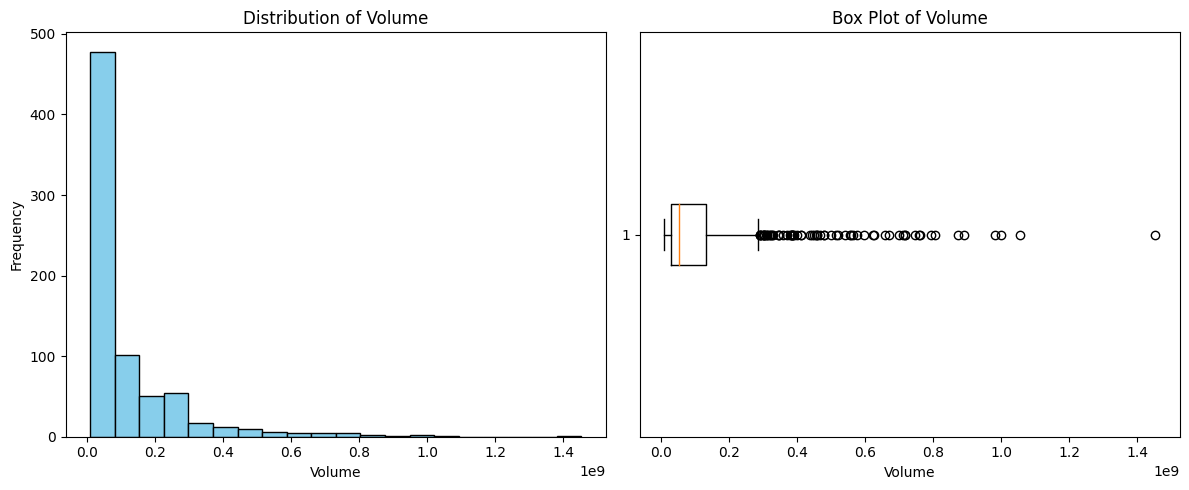

The p-value 2.2177548131108515e-37 is lower than the significance level 0.05. 
Hence, there is statistical significance to reject H0, i.e., the data does not appear to be normally distributed.


In [13]:
#Assess the distribution (and normality) of the desired column: prev_weeks_vol_data
assess_normality(prev_weeks_vol_data)

In [14]:
#The previous assessment leads to the imputation of the remaining MV of previous_weeks_volume with the median value of the variable. 
df['previous_weeks_volume'].fillna(df['previous_weeks_volume'].median(), inplace=True)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1.0,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616.0,3.79267,NaN,52758908.0,16.71,15.97,-4.42849,26.0,0.182704
1,1.0,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398.0,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19.0,0.187852
2,1.0,AA,2011-01-21,16.19,16.38,15.6,15.79,138428495.0,-2.47066,-43.024959,242963398.0,15.87,16.13,1.63831,12.0,0.189994
3,1.0,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173.0,1.63831,9.3555,138428495.0,16.18,17.14,5.93325,5.0,0.185989
4,1.0,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761.0,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97.0,0.175029


##### Variable 'percent_change_volume_over_last_week' MVs' imputation
 - percent_change_volume_over_last_wk: the percentage change in the number of shares of stock that traded hands for this week compared to the previous week

In [15]:
#We need volume variable again :)
#recall -> volume: the number of shares of stock that traded hands in the week
df[['volume', 'percent_change_volume_over_last_wk']]

,volume,percent_change_volume_over_last_wk
0,239655616.0,NaN
1,242963398.0,1.380223
2,138428495.0,-43.024959
3,151379173.0,9.3555
4,154387761.0,1.987452
...,...,...
745,68230855.0,-21.355713
746,78616295.0,15.221032
747,92380844.0,17.508519
748,100521400.0,8.811952


In [16]:
# Calculate the percentage change for each row where 'percent_change_volume_over_last_wk' is NaN
for i, row in df.iterrows():
    if i>0 and pd.isna(row['percent_change_volume_over_last_wk']):
        current_volume = row['volume']
        previous_volume = df.at[i - 1, 'volume']  # Get the volume from the previous row
        #"Regra de 3 simples" to reach the corresponding percentage of the new week, compared to the old. Need to remove the old week value: will be 100%
        percent_change = ((current_volume*100) / previous_volume) - 100
        df.at[i, 'percent_change_volume_over_last_wk'] = percent_change
df[['volume', 'percent_change_volume_over_last_wk']].head()

,volume,percent_change_volume_over_last_wk
0,239655616.0,NaN
1,242963398.0,1.380223
2,138428495.0,-43.024959
3,151379173.0,9.3555
4,154387761.0,1.987452


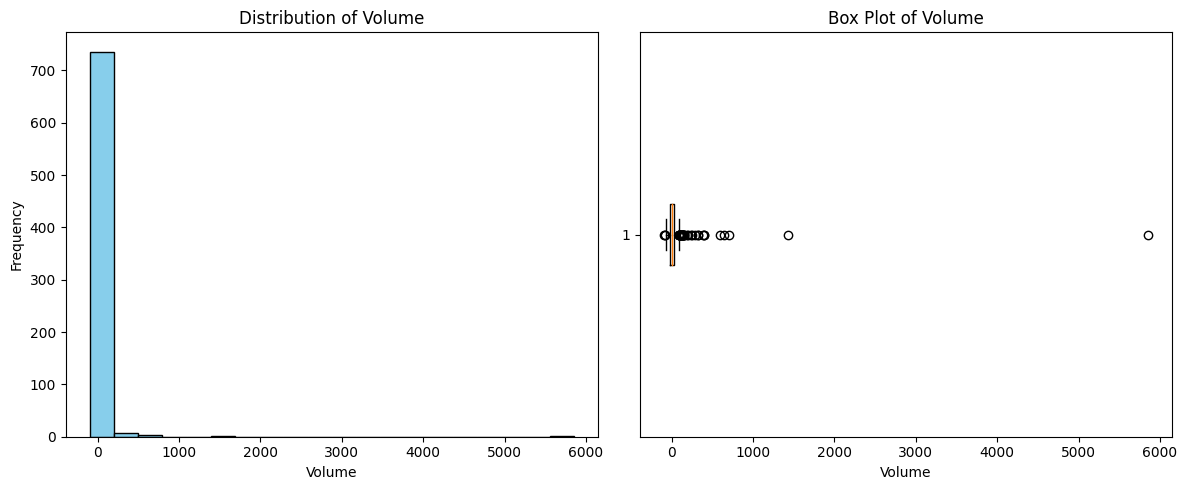

The p-value 0.0 is lower than the significance level 0.05. 
Hence, there is statistical significance to reject H0, i.e., the data does not appear to be normally distributed.


In [17]:
# Save non-NaN observations of previous_weeks_volume into prev_weeks_vol_data series
percent_change_volume_over_last_wk_data=df.dropna(subset=['percent_change_volume_over_last_wk'])['percent_change_volume_over_last_wk']

#Assess the distribution (and normality) of the desired column: prev_weeks_vol_data
assess_normality(percent_change_volume_over_last_wk_data)

In [18]:
#The previous assessment leads to the imputation of the remaining MV of previous_weeks_volume with the median value of the variable. 
df['percent_change_volume_over_last_wk'].fillna(df['percent_change_volume_over_last_wk'].median(), inplace=True)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1.0,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616.0,3.79267,0.934330,52758908.0,16.71,15.97,-4.42849,26.0,0.182704
1,1.0,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398.0,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19.0,0.187852
2,1.0,AA,2011-01-21,16.19,16.38,15.6,15.79,138428495.0,-2.47066,-43.024959,242963398.0,15.87,16.13,1.63831,12.0,0.189994
3,1.0,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173.0,1.63831,9.355500,138428495.0,16.18,17.14,5.93325,5.0,0.185989
4,1.0,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761.0,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97.0,0.175029


In [19]:
# Fix the object dtypes -> numerical columns to numeric
numerical_cols = [col for col in df.columns if col not in ['stock', 'date']]

# Convert selected columns to numeric
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [20]:
#Assess if the conversion was succeeded -> it was!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    float64       
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    float64       
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  750 non-null    float64       
 10  previous_weeks_volume     

### Variable Derivation 


In [21]:
numerical_cols

['quarter',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

In [22]:
# 1. Price Change Ratios
df['price_change_ratio'] = df['close'] / df['close'].shift(1)

# 2. Calendar-related Features
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# 3. Volume-based Features
df['volume_to_avg_volume_ratio'] = df['volume'] / df['previous_weeks_volume']

''' 
# 4. Volatility Measures (using standard deviation)
window = 7  # Can be adjusted as intended
df['volatility'] = df['close'].rolling(window=window).std()

# 5. Relative Strength Index (RSI)
# Intermediate Calcs
# Calculate price changes
df['price_change'] = df['close'] - df['close'].shift(1)
# Calculate gains and losses
df['gain'] = df['price_change'].apply(lambda x: x if x > 0 else 0)
df['loss'] = df['price_change'].apply(lambda x: abs(x) if x < 0 else 0)
# Calculate average gains and losses over a specified time period
window = 14  # Can be adjusted as intended
df['average_gain'] = df['gain'].rolling(window=window).mean()
df['average_loss'] = df['loss'].rolling(window=window).mean()

# Calculate relative strength (RS) and relative strength index (RSI)
df['relative_strength'] = df['average_gain'] / df['average_loss']
df['rsi'] = 100 - (100 / (1 + df['relative_strength']))

# 6. Moving Averages (weekly, 15-day, and monthly moving averages)
df['weekly_ma'] = df['close'].rolling(window=7).mean()
df['quinzenal_ma'] = df['close'].rolling(window=15).mean()
df['monthly_ma'] = df['close'].rolling(window=30).mean()

# Drop intermediate columns used for RSI calculation
df.drop(['price_change', 'gain', 'loss', 'average_gain', 'average_loss', 'relative_strength'], axis=1, inplace=True)
'''
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,price_change_ratio,day_of_week,month,volume_to_avg_volume_ratio
0,1.0,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616.0,3.79267,0.934330,52758908.0,16.71,15.97,-4.428490,26.0,0.182704,NaN,4,1,4.542467
1,1.0,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398.0,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19.0,0.187852,0.972594,4,1,1.013802
2,1.0,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495.0,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12.0,0.189994,0.988729,4,1,0.569750
3,1.0,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173.0,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5.0,0.185989,1.021533,4,1,1.093555
4,1.0,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761.0,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97.0,0.175029,1.062616,4,2,1.019875


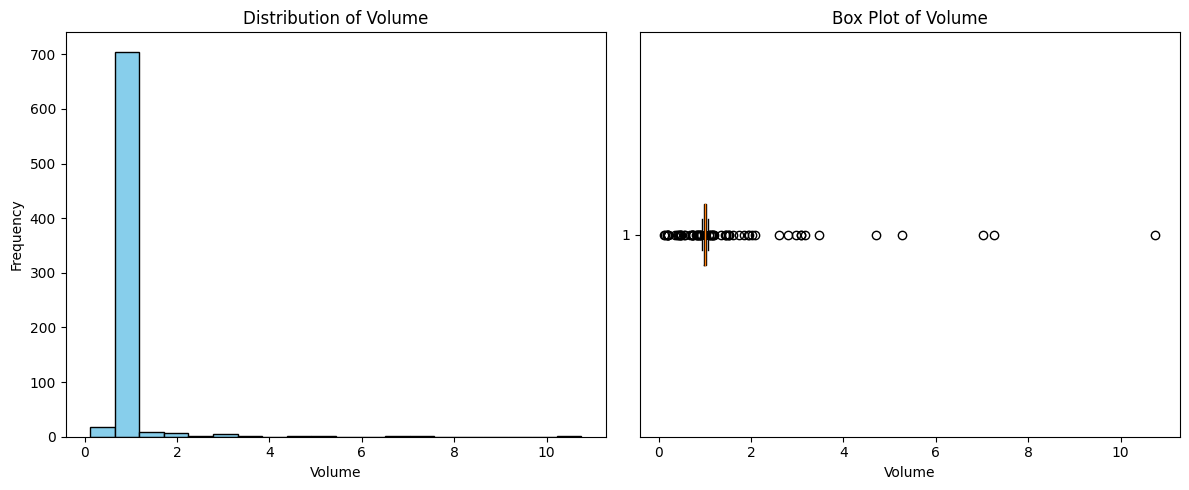

The p-value 0.0 is lower than the significance level 0.05. 
Hence, there is statistical significance to reject H0, i.e., the data does not appear to be normally distributed.


In [23]:
# Save non-NaN observations of previous_weeks_volume into prev_weeks_vol_data series
percent_change_volume_over_last_wk_data=df.dropna(subset=['price_change_ratio'])['price_change_ratio']

#Assess the distribution (and normality) of the desired column: prev_weeks_vol_data
assess_normality(percent_change_volume_over_last_wk_data)

In [24]:
#The previous assessment leads to the imputation of the remaining MV of previous_weeks_volume with the median value of the variable. 
df['price_change_ratio'].fillna(df['price_change_ratio'].median(), inplace=True)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,price_change_ratio,day_of_week,month,volume_to_avg_volume_ratio
0,1.0,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616.0,3.79267,0.934330,52758908.0,16.71,15.97,-4.428490,26.0,0.182704,0.999038,4,1,4.542467
1,1.0,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398.0,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19.0,0.187852,0.972594,4,1,1.013802
2,1.0,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495.0,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12.0,0.189994,0.988729,4,1,0.569750
3,1.0,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173.0,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5.0,0.185989,1.021533,4,1,1.093555
4,1.0,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761.0,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97.0,0.175029,1.062616,4,2,1.019875


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    float64       
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    float64       
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  750 non-null    float64       
 10  previous_weeks_volume     

### Statistics, Insights, and Data Visualization

In [26]:
df.describe()

,quarter,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,price_change_ratio,day_of_week,month,volume_to_avg_volume_ratio
count,750.000000,750,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000
mean,1.520000,2011-03-31 23:02:24,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,19.607898,1.168275e+08,53.702440,53.889080,0.238468,52.525333,0.691826,1.054185,3.96000,3.520000,1.200790
min,1.000000,2011-01-07 00:00:00,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-96.636950,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574,0.119464,3.00000,1.000000,0.033630
25%,1.000000,2011-02-18 00:00:00,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-20.220722,3.063918e+07,30.315000,30.462500,-1.222068,24.000000,0.534549,0.982855,4.00000,2.000000,0.797793
50%,2.000000,2011-04-01 00:00:00,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,0.934330,5.275891e+07,46.015000,46.125000,0.101193,47.000000,0.681067,0.999038,4.00000,4.000000,1.009571
75%,2.000000,2011-05-13 00:00:00,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,23.063086,1.327218e+08,72.715000,72.915000,1.845562,69.000000,0.854291,1.017748,4.00000,5.000000,1.232131
max,2.000000,2011-06-24 00:00:00,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,5850.973288,1.453439e+09,172.110000,174.540000,9.882230,336.000000,1.564210,10.752852,4.00000,6.000000,59.509733
std,0.499933,NaN,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,228.601675,1.584332e+08,32.778111,33.016677,2.679538,46.335098,0.305482,0.572838,0.19609,1.677305,2.289269


In [27]:
print(f"There are {len(df['stock'].unique())} stocks: {df['stock'].unique()}")

There are 30 stocks: ['AA' 'AXP' 'BA' 'BAC' 'CAT' 'CSCO' 'CVX' 'DD' 'DIS' 'GE' 'HD' 'HPQ' 'IBM'
 'INTC' 'JNJ' 'JPM' 'KRFT' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'PFE' 'PG' 'T'
 'TRV' 'UTX' 'VZ' 'WMT' 'XOM']


In [28]:
def get_nr_rows_per_stock(column):
    # Group df by column and count the number of rows for each column value
    row_counts = column.value_counts()

    # Get the count of the first stock -> will represent the number of rows of that stock
    first_stock_count = row_counts.iloc[0]

    # List to store stocks with different counts (store both stock name and count value)
    different_counts = []

    # Compare the count of the first stock with the counts of the remaining stocks
    for stock, count in row_counts.items():
        if count != first_stock_count:
            different_counts.append((stock, count))

    # If any stock has a different count, print the results
    if different_counts:
        print("The following stocks have a different number of rows:")
        for stock, count in different_counts:
            print(f"{stock}: {count} rows")
    else:
        print("All stocks have the same number of rows:", first_stock_count)

In [29]:
get_nr_rows_per_stock(df['stock'])

All stocks have the same number of rows: 25


In [30]:
stock_with_max_close = df.loc[df['close'].idxmax(), 'stock']
stock_with_min_close = df.loc[df['close'].idxmin(), 'stock']
print(f"Stock with the highest closing price: {stock_with_max_close} \nStock with the lowest closing price: {stock_with_min_close}.")

Stock with the highest closing price: IBM 
Stock with the lowest closing price: BAC.


In [31]:
def data_evolution_and_distribution(column_to_visualize):
    # Group df by column values
    column_data = df.groupby('stock')

    #PLOT 1 -> Data Evolution (Time Series Evolution)
    plt.figure(figsize=(13, 7))
    # Plot the evolution of each stock
    for stock, data in column_data:
        #if stock != 'IBM':
        plt.plot(data['date'], data[column_to_visualize], label=stock)

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel(f'{column_to_visualize} Price')
    plt.title('Stock Evolution')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=10) 
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

    #PLOT 2 -> Data Distribution Visual Assessment
    #Plot 2.1: Boxplots for each stock
    # Create subplots for boxplots
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1

    # Extract the unique stocks and their corresponding data
    stocks = list(column_data.groups.keys())
    data = [column_data.get_group(stock)[column_to_visualize] for stock in stocks]

    # Plot boxplots
    plt.boxplot(data, labels=stocks)
    plt.title(f'Boxplot of {column_to_visualize} Values for Each Stock')
    plt.xlabel('Stock')
    plt.ylabel(f'{column_to_visualize} Value')
    plt.xticks(rotation=45)
    plt.tight_layout()

    #Plot 2.2: Histograms for each stock
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
    for stock, data in column_data:
        plt.hist(data[column_to_visualize], bins=20, alpha=0.5, label=stock)

    plt.title(f'Histogram of {column_to_visualize} Values for Each Stock')
    plt.xlabel(f'{column_to_visualize} Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=15)  # Place legend at the bottom horizontally
    plt.tight_layout()

    plt.show()

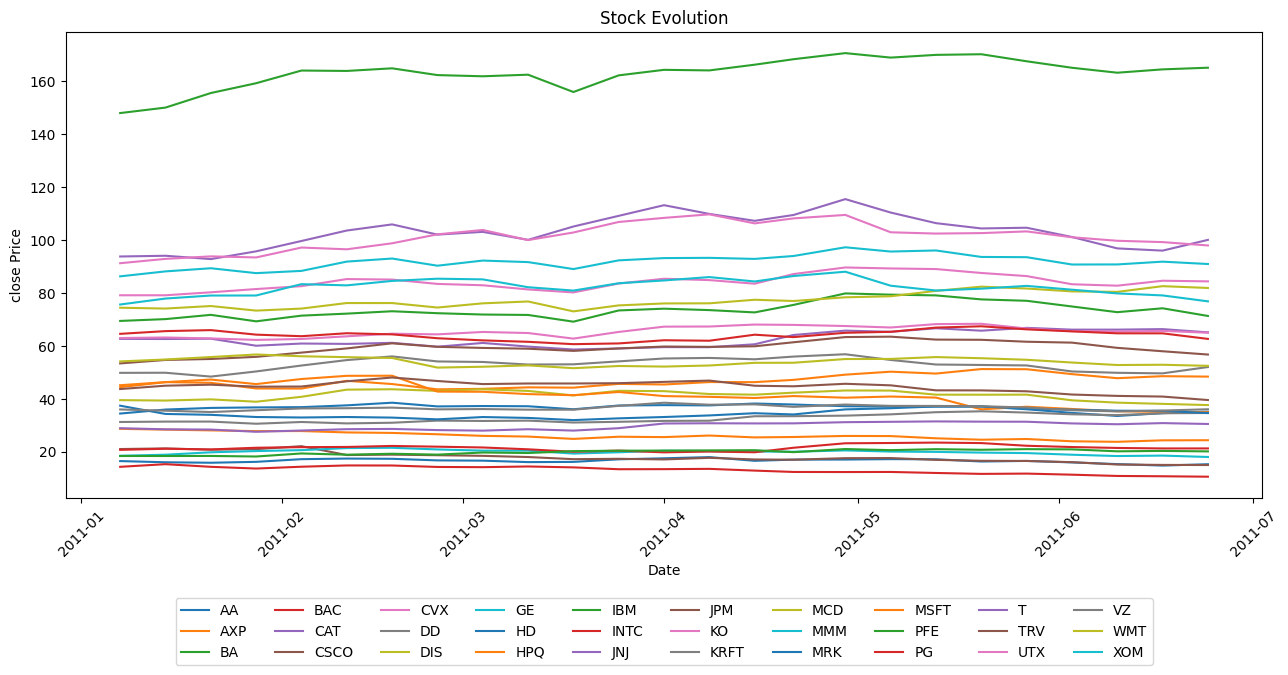

C:\Users\Carolina\AppData\Local\Temp\ipykernel_21740\1012835865.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


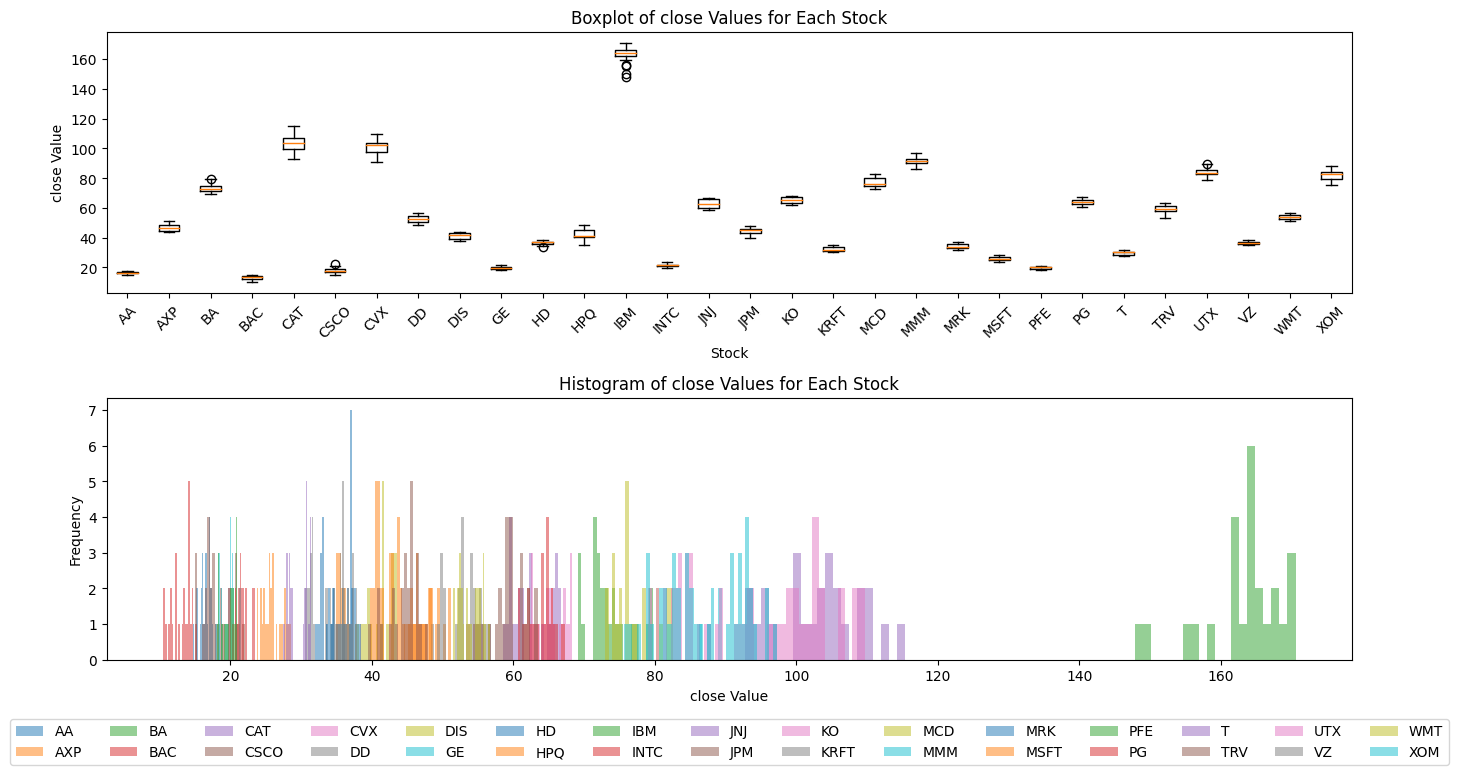

In [32]:
data_evolution_and_distribution('close')

The stock with highest closing values is IBM. It is an outlier in terms of prices.

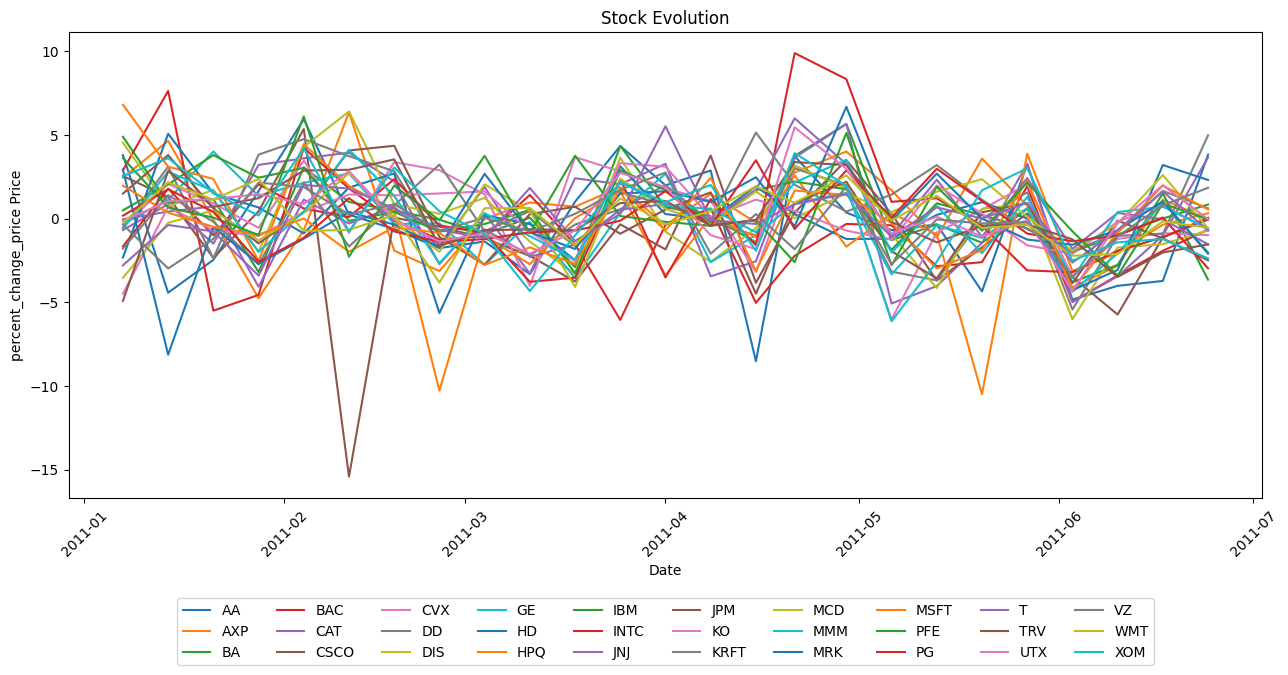

C:\Users\Carolina\AppData\Local\Temp\ipykernel_21740\1012835865.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


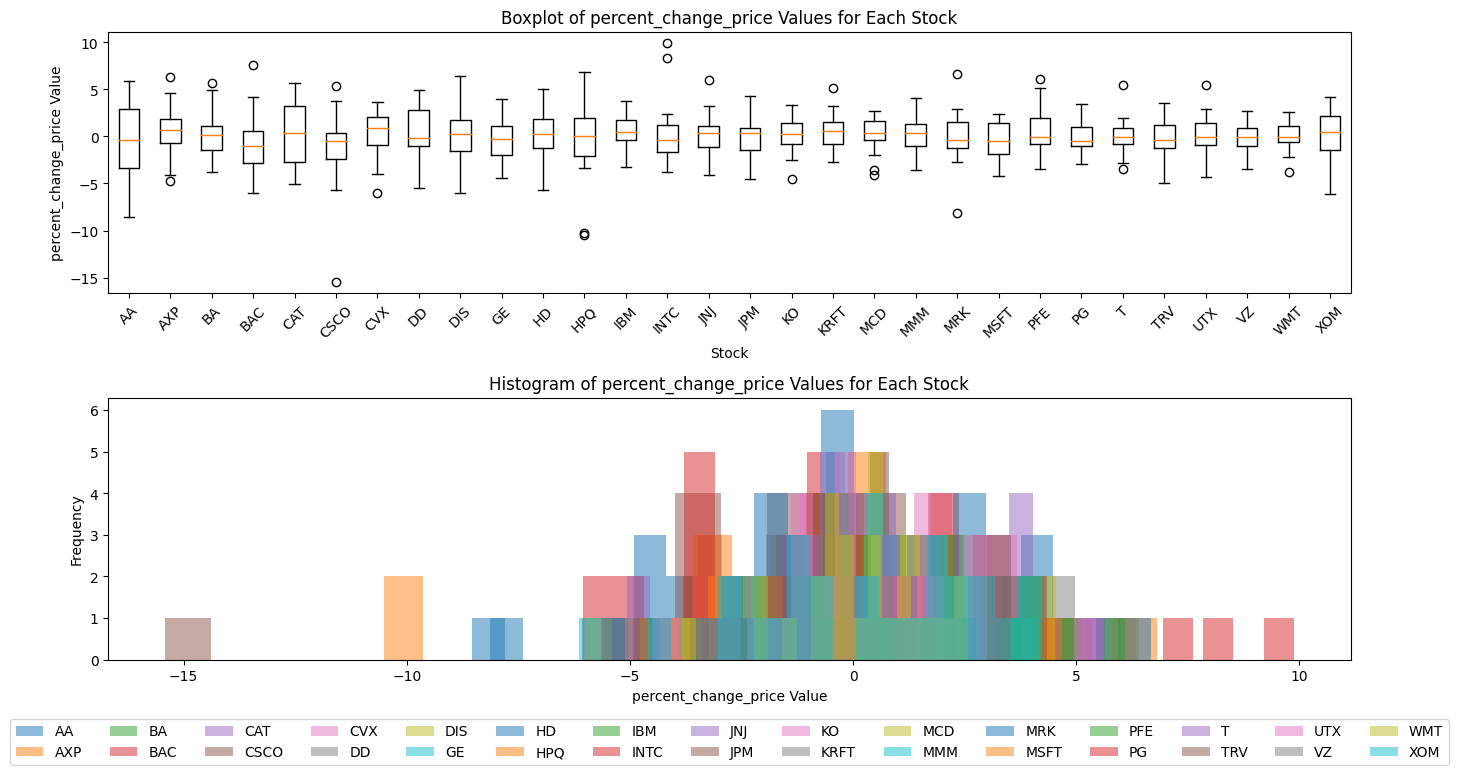

In [33]:
data_evolution_and_distribution('percent_change_price')

The stock with the most negative percentage price changes is CSCO, followed by HPQ. On the contrary, INTC shows the highest percentage price changes of all stocks.

In [34]:
print(f"Count of percent_change_price equal or above 0 is {(df['percent_change_price'] >= 0).sum()}, which represents {((df['percent_change_price'] >= 0).sum()/(df['percent_change_price']).count())*100}%.")
print(f"Count of negative percent_change_price is {(df['percent_change_price'] < 0).sum()}, which represents {((df['percent_change_price'] < 0).sum()/(df['percent_change_price']).count())*100}%.")

Count of percent_change_price equal or above 0 is 377, which represents 50.26666666666667%.
Count of negative percent_change_price is 373, which represents 49.733333333333334%.


In [35]:
# Append all new (derived) variables to the existing list of numerical columns
numerical_cols.extend(['price_change_ratio', 'day_of_week', 'month', 'volume_to_avg_volume_ratio'])

## Feature Selection 

### Correlation Analysis

Highly or perfectly correlated variables should / cannot cannot be considered together for the modelling phase. Why:
 - Perfectly correlated variables means redundant information to the model, leading to multicollinearity. The latter interferes with parameter estimation and increase the variance of the estimates, making the model less reliable.
 - Multicollinearity caused by perfectly correlated variables can make the model coefficients sensitive to small changes in the data -> unstable parameter estimates and model predictions.
 - Perfectly correlated variables can lead to overfitting -> model learns to fit the noise of the train data and is unable to generalize to new unseen data (once it does not learn the data patterns).
 - Highly correlated explanatory vars can lead to singular matrices and prevent the model from converging or producing meaningful results.
 - A highly correlated variable is redundant - it can become a problem to ascertain wich variables are driving the behavior of the model.

Limitations:
 - Only measures the linear relationships between variables (if variables are related non-linearly, it won't capture it)

In [ ]:
y = 'percent_change_next_weeks_price'

In [72]:
def select_top_correlated_variables(df, numerical_cols, y, plot_correlation=False):
    # Create the correlation matrix
    correlation_matrix = df[numerical_cols].corr()

    # Plot correlation matrix if plot_correlation is True
    if plot_correlation:
        plt.figure(figsize=(20, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Plot of Numerical Variables')
        plt.show()

    # Calculate correlations with y variable: 'percent_change_next_weeks_price'
    correlations_with_y = abs(correlation_matrix[y]).sort_values(ascending=False)
    #print(f"Correlation coefficients with {y}: {correlations_with_y}")

    # Identify pairs of features with high correlation
    highly_correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

    #print(f"\nAssessing highly correlated variables: \nPairs of features with correlation coefficient > 0.8 or < -0.8 among each other: \n{highly_correlated_pairs}.")

    # Select the top 4 most correlated variables with 'percent_change_next_weeks_price'
    top_correlated_variables = correlations_with_y.index[1:5]
    #print(f"Top 4 most correlated variables with {y}: \n{top_correlated_variables}")

    # Create all possible pairs with the variables from 'top_correlated_variables'
    possible_pairs = list(combinations(top_correlated_variables, 2))

    # Check if any of these pairs match the highly correlated pairs
    conflicting_pairs = []
    for pair in possible_pairs:
        if pair in highly_correlated_pairs:
            conflicting_pairs.append(pair)

    # If conflicting pairs are found, print them
    if conflicting_pairs:
        #print(f"Pairs of selected variables that are highly correlated with each other: {conflicting_pairs}. \nOne variable from each conflicting pair needs to be dropped.")
        return None
    else:
        #print("No conflicting pairs found. All good.")
        return top_correlated_variables.to_list()

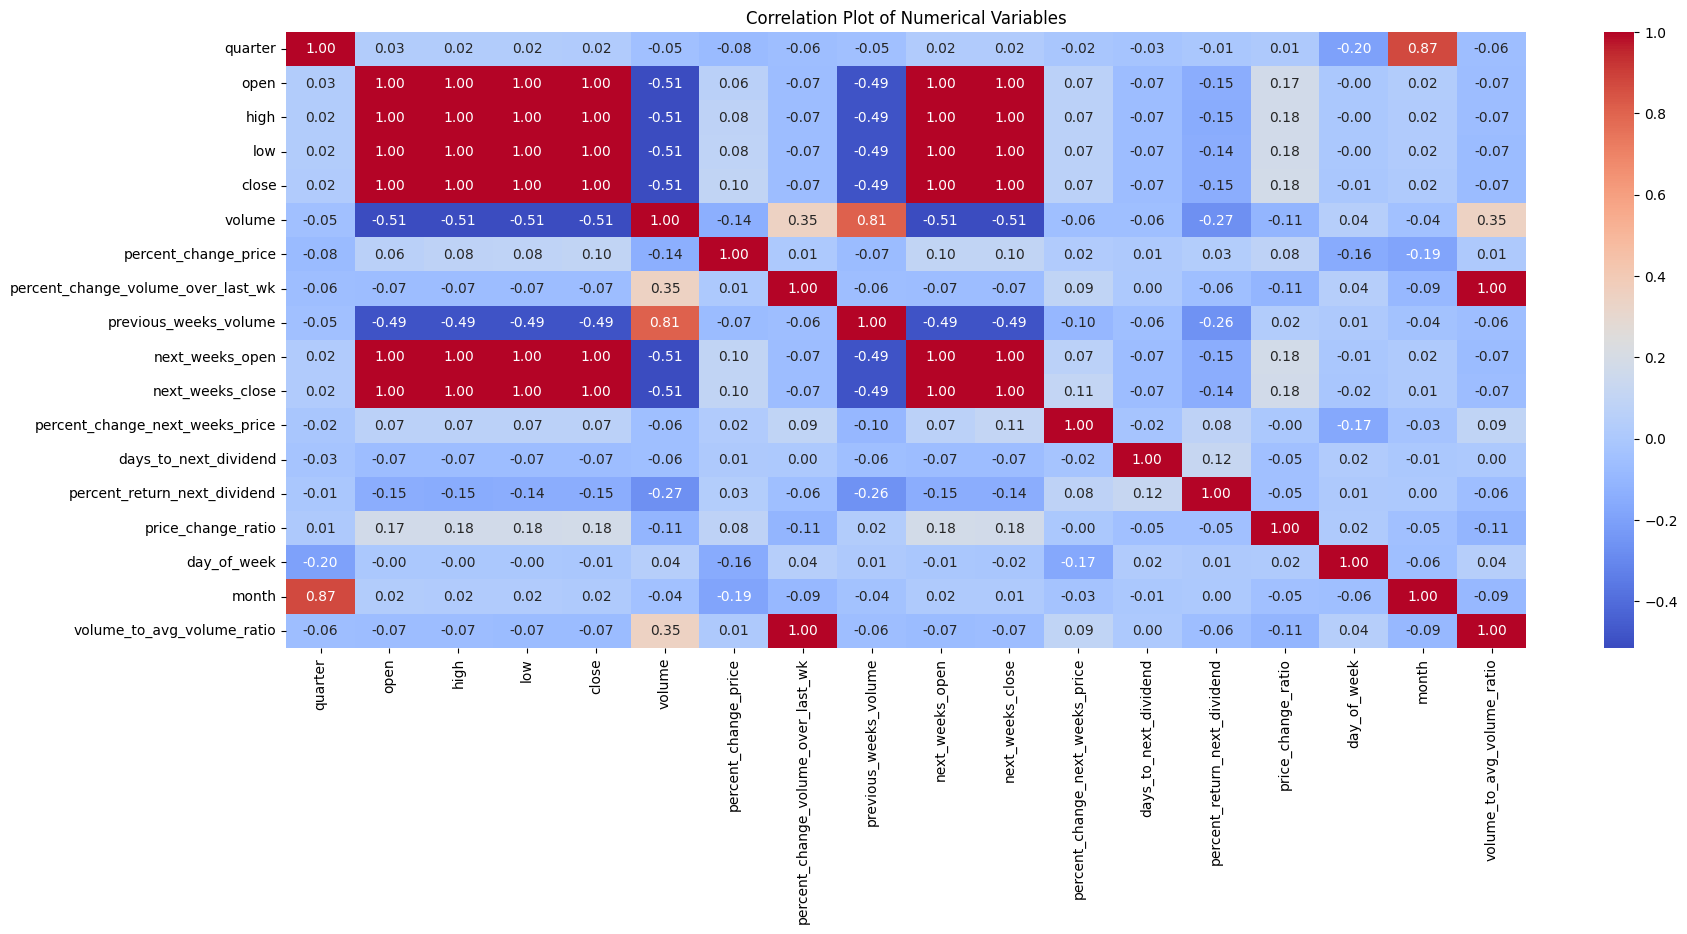

['day_of_week',
 'next_weeks_close',
 'previous_weeks_volume',
 'percent_change_volume_over_last_wk']

In [73]:
feat_selection_corr = select_top_correlated_variables(df, numerical_cols, 'percent_change_next_weeks_price', plot_correlation=True)
feat_selection_corr

### Mutual Information
 - Used for feature Selection by https://www.mdpi.com/2076-3417/14/5/1960

MI notes:
 - Measures the amount of information obtained about one variable through the other variable, i.e., quantifies the amount of information shared between two variables.
 - Works for linear or non-linear relationships.
 - Can be used for continuous and discrete variables.

## Train Test Split

Can take 2 approaches: The traditional train-test split (with 20/30% of data reserved for testing), or go for cross-validation.
Thoughts:
 - Does it make sense to use CV to train a time series model? I believe not, here's why:
    - I could be using future info to predict past data, which is not correct.
 - Hence, maybe the traditional train-test split is better, being the train data all the data available until the data point I want to predict, making it the test data set (actually data point)

In [100]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,price_change_ratio,day_of_week,month,volume_to_avg_volume_ratio
0,1.0,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616.0,3.79267,0.934330,52758908.0,16.71,15.97,-4.428490,26.0,0.182704,0.999038,4,1,4.542467
1,1.0,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398.0,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19.0,0.187852,0.972594,4,1,1.013802
2,1.0,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495.0,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12.0,0.189994,0.988729,4,1,0.569750
3,1.0,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173.0,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5.0,0.185989,1.021533,4,1,1.093555
4,1.0,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761.0,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97.0,0.175029,1.062616,4,2,1.019875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2.0,XOM,2011-05-27,80.22,82.63,80.07,82.63,68230855.0,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75.0,0.568801,1.012995,4,5,0.786443
746,2.0,XOM,2011-06-03,83.28,83.75,80.18,81.18,78616295.0,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68.0,0.578960,0.982452,4,6,1.152210
747,2.0,XOM,2011-06-10,80.93,81.87,79.72,79.78,92380844.0,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61.0,0.589120,0.982754,4,6,1.175085
748,2.0,XOM,2011-06-17,80.00,80.82,78.33,79.02,100521400.0,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54.0,0.594786,0.990474,4,6,1.088120


-----
*Add here your data understanding findings and conclusions (max. 200 words)*

-----

## Modelling
In this phase, your main goal is to develop and describe your approach to the solution of the problem. Some guidelines to help you:
* What metrics will you use to evaluate your solutions?
* What are some algorithms that can lead to good results? And why?
* Describe in detail your thought process during the development of your solution.
* Present your results.


-----


## ARIMA

ARIMA Notes

Index:
 - date variable

Target Variable:
 - percent_change_next_weeks_price: The variable I want to predict.

Exogenous Variables (optional):
 - open, high, low, close, volume, percent_change_price, percent_change_volume_over_last_wk, previous_weeks_volume: Historical values of these variables might provide additional information that could help improve the forecast accuracy. E.g., past price changes, volume changes, etc., could influence future price changes.
 
 - days_to_next_dividend, percent_return_next_dividend: These variables might also be relevant if dividends have an impact on stock prices.

Defining (p, d, q) can be achieved analysing ACF (q) and PACF (p) plots. d is given by the number of times the series needs to be differenciated to become stationary


Early experiments for IBM

In [136]:
ibm_data = df[df['stock'] == 'IBM'].copy()

# Set the 'date' column as the index
ibm_data.set_index('date', inplace=True)

# Set ts data as a univariate ts
ts_data = ibm_data['percent_change_next_weeks_price']

# To create a multivariate ts:
# ts_data = ibm_data[['percent_change_next_weeks_price', 'volume']]

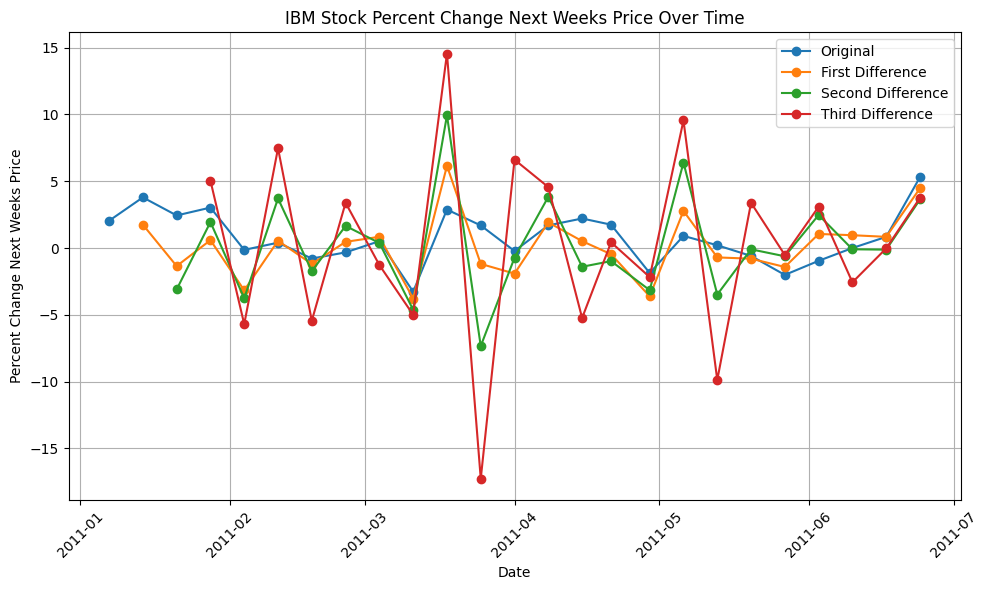

In [137]:
# Filter data for IBM stock
#ibm_data = df[df['stock'] == 'IBM']

# Filter data for IBM stock and create a copy
ibm_data = df[df['stock'] == 'IBM'].copy()

# Differentiate the percent_change_next_weeks_price
ibm_data['diff_percent_change'] = ibm_data['percent_change_next_weeks_price'].diff()

# Apply differentiation again (second time)
ibm_data['diff2_percent_change'] = ibm_data['diff_percent_change'].diff()

# Apply differentiation again (third time)
ibm_data['diff3_percent_change'] = ibm_data['diff2_percent_change'].diff()

# Plot all four series
plt.figure(figsize=(10, 6))
plt.plot(ibm_data['date'], ibm_data['percent_change_next_weeks_price'], label='Original', marker='o', linestyle='-')
plt.plot(ibm_data['date'], ibm_data['diff_percent_change'], label='First Difference', marker='o', linestyle='-')
plt.plot(ibm_data['date'], ibm_data['diff2_percent_change'], label='Second Difference', marker='o', linestyle='-')
plt.plot(ibm_data['date'], ibm_data['diff3_percent_change'], label='Third Difference', marker='o', linestyle='-')
plt.title('IBM Stock Percent Change Next Weeks Price Over Time')
plt.xlabel('Date')
plt.ylabel('Percent Change Next Weeks Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


d=1. Now we need to assess the ACF (q) and PACF (p) plots

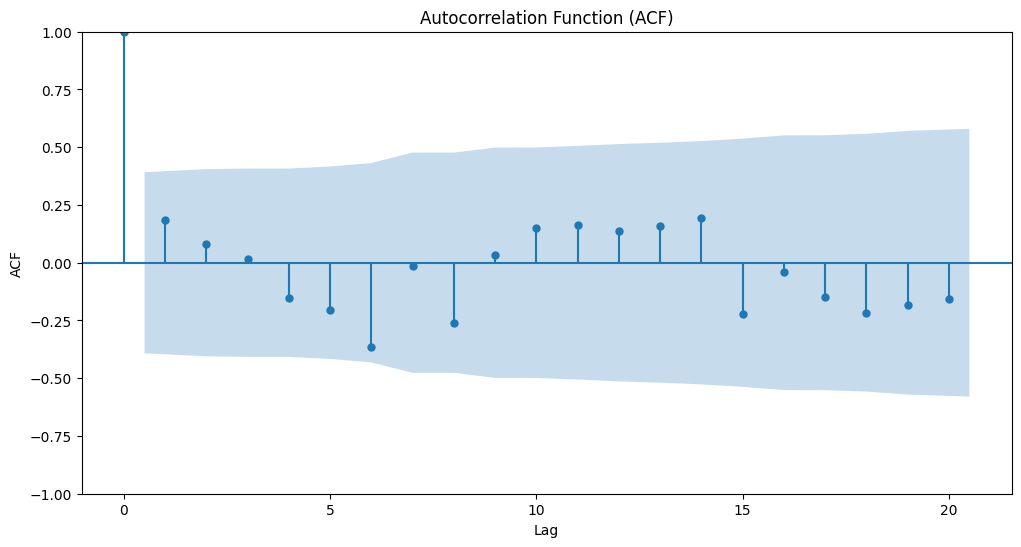

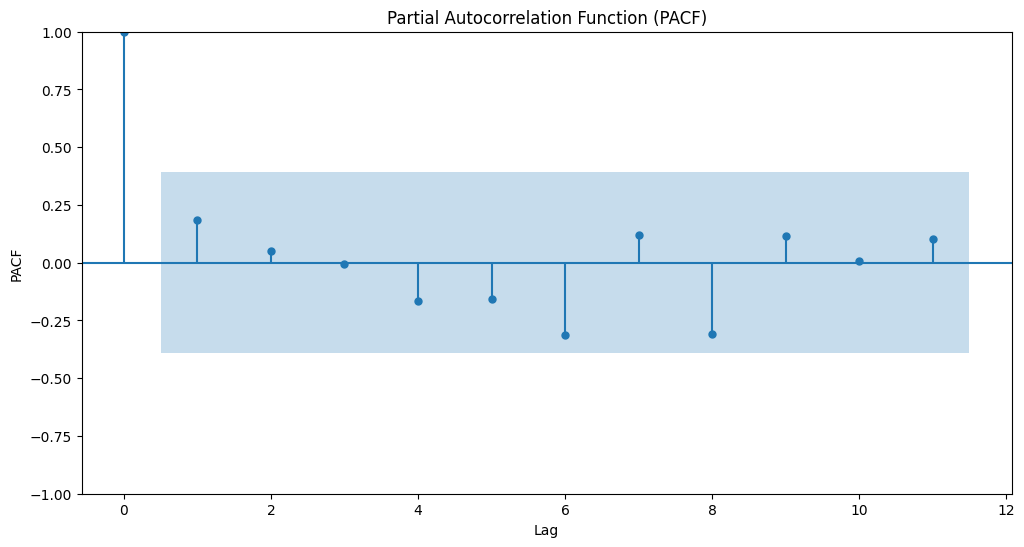

In [141]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(ts_data, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF with reduced number of lags #11 the maximum it allows
plt.figure(figsize=(12, 6))
plot_pacf(ts_data, lags=11, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

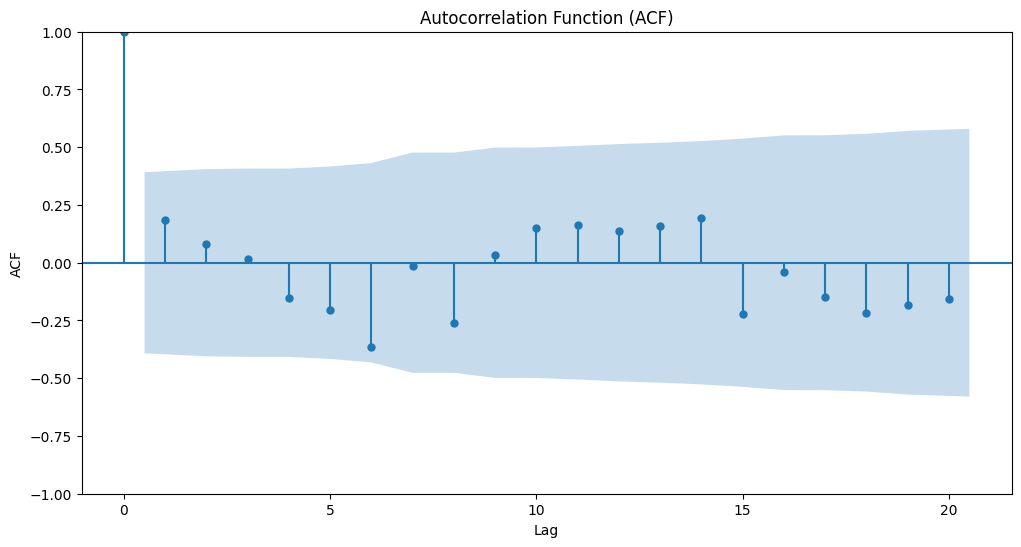

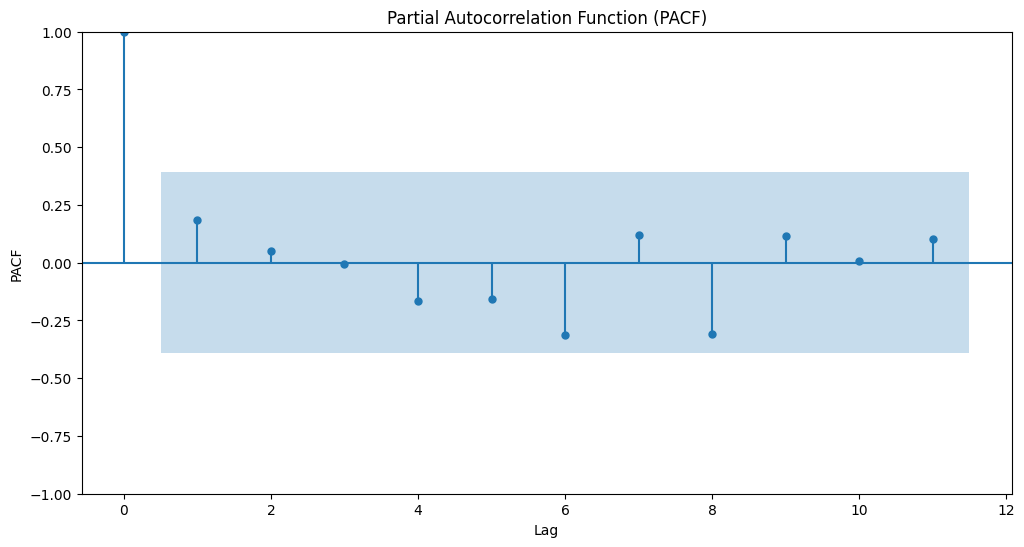

In [138]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(ibm_data['percent_change_next_weeks_price'], lags=20, ax=plt.gca()) #It is the same as ts_data (only other way of defining it)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF with reduced number of lags #11 the maximum it allows
plt.figure(figsize=(12, 6))
plot_pacf(ibm_data['percent_change_next_weeks_price'], lags=11, ax=plt.gca()) #It is the same as ts_data (only other way of defining it)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [140]:
ts_data

date
2011-01-07    2.040820
2011-01-14    3.791220
2011-01-21    2.438550
2011-01-28    3.028020
2011-02-04   -0.140176
2011-02-11    0.401998
2011-02-18   -0.788653
2011-02-25   -0.326435
2011-03-04    0.513614
2011-03-11   -3.270040
2011-03-18    2.879980
2011-03-25    1.689980
2011-04-01   -0.225033
2011-04-08    1.694810
2011-04-15    2.210880
2011-04-21    1.747690
2011-04-29   -1.870900
2011-05-06    0.908605
2011-05-13    0.206113
2011-05-20   -0.593472
2011-05-27   -2.012590
2011-06-03   -0.958971
2011-06-10    0.000000
2011-06-17    0.836897
2011-06-24    5.309520
Name: percent_change_next_weeks_price, dtype: float64

In [139]:
# Intention: have a way to define q and p "automatically" -> p will be given by Significant PACF Lags and q by Significant ACF Lags. If none, p and q = 0

# Calculate the autocorrelation function (ACF) and partial autocorrelation function (PACF)
acf = sm.tsa.acf(ts_data, fft=False)
pacf = sm.tsa.pacf(ts_data)

# Determine the significant lags based on the confidence interval
# For ACF, significant lags are those where the absolute value of the autocorrelation is above the 95% CI
significant_acf_lags = np.where(np.abs(acf) > 1.96)[0]  # 95% confidence interval
# For PACF, significant lags are those where the absolute value of the partial autocorrelation is above the 95% CI
significant_pacf_lags = np.where(np.abs(pacf) > 1.96)[0]  # 95% confidence interval

print("Significant ACF Lags:", significant_acf_lags)
print("Significant PACF Lags:", significant_pacf_lags)

Significant ACF Lags: []
Significant PACF Lags: []


The p and q is given by the significant number of lags at PACF and ACF plots. The blue bands on the plots indicate the 95% CI -> the spikes that go over (or below) this band are considered statistically significant.

Summary: All spikes are contained in the CI, so q and p are 0.

This leads to a (p,d,q) of (0,1,0)

In [125]:
stock_data = df[df['stock'] == 'IBM']

# Split the data into training and testing sets
train_data = stock_data.iloc[:-1]  # Use all data except the last week for training
test_data = stock_data.iloc[-1]  # Use the last week for testing

# Fit an ARIMA model
model = ARIMA(train_data['percent_change_next_weeks_price'], order=(0, 1, 0))  # Replace p, d, q with appropriate values 
arima_model = model.fit()

# Validate the model
predictions = arima_model.forecast(steps=len(test_data))

# Calculate evaluation metrics (e.g., MSE, MAE, RMSE)

# Predict future values
future_forecast = arima_model.forecast(steps=1)  # Forecast for the next week
print(future_forecast)
print(test_data)

24    0.836897
dtype: float64
quarter                                               2.0
stock                                                 IBM
date                                  2011-06-24 00:00:00
open                                                163.7
high                                               166.81
low                                                163.59
close                                              165.07
volume                                         22984546.0
percent_change_price                             0.836897
percent_change_volume_over_last_wk             -21.794738
previous_weeks_volume                          29390025.0
next_weeks_open                                    165.74
next_weeks_close                                   174.54
percent_change_next_weeks_price                   5.30952
days_to_next_dividend                                45.0
percent_return_next_dividend                     0.454353
price_change_ratio                        

c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Carolin

In [128]:
stock_data = df[df['stock'] == 'IBM']

# Define exogenous variables (potential explanatory variables)
exog_vars = [#'open', 'high', 'low', 
            #'close', 
            #'volume', #'percent_change_price',             'percent_change_volume_over_last_wk', 'previous_weeks_volume', 'days_to_next_dividend', 'percent_return_next_dividend',
            'day_of_week']

# Add exogenous variables to both training and testing datasets
train_exog = stock_data.loc[:, exog_vars].iloc[:-1]  # Use all data except the last week for training
test_exog = stock_data.loc[:, exog_vars].iloc[-1]   # Use the last week for testing

# Convert test_exog to numpy array and reshape it
test_exog_array = np.array(test_exog).reshape(1, -1)

# Define the target variable (percent_change_next_weeks_price)
y_train = stock_data['percent_change_next_weeks_price'].iloc[:-1]  # Use all data except the last week for training
y_test = stock_data['percent_change_next_weeks_price'].iloc[-1]    # Use the last week for testing

# Fit an ARIMA model with exogenous variables
model = ARIMA(y_train, order=(0, 1, 0), exog=train_exog)  # Replace p, d, q with appropriate values
arima_model = model.fit()

# Validate the model
predictions = arima_model.forecast(steps=len(test_exog_array), exog=test_exog_array)

# Calculate evaluation metrics (e.g., MSE, MAE, RMSE)

# Predict future values
future_forecast = arima_model.forecast(steps=1, exog=test_exog_array)  # Forecast for the next week
print(future_forecast)
print(y_test)

24    0.836897
dtype: float64
5.30952


c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Carolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Carolin

## SARIMA

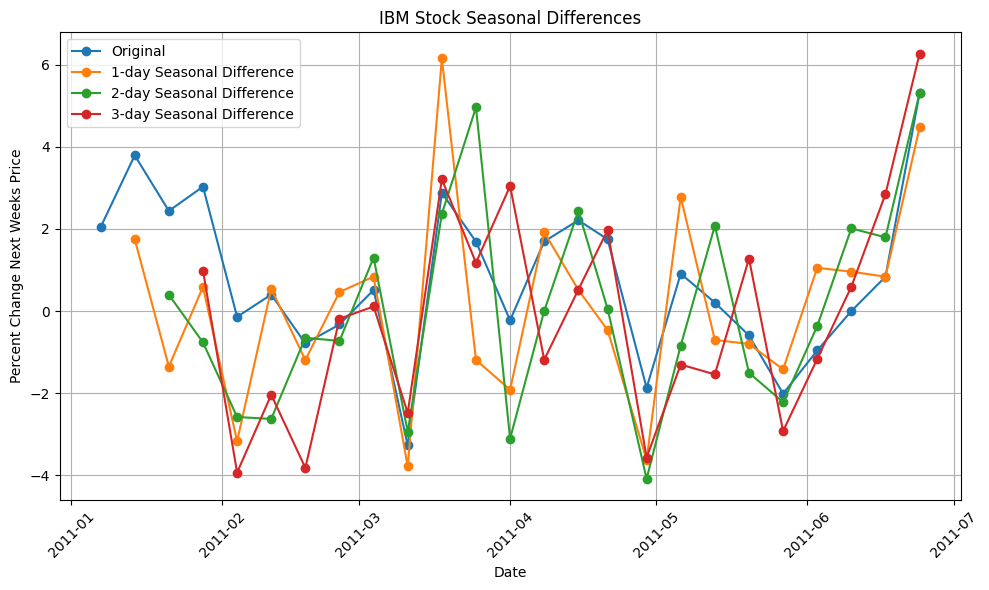

In [129]:
# Define seasonal lags to test - 1,2 and 3 weeks
seasonal_lags = [1, 2, 3]  # You can adjust these values based on the frequency of your data

# Apply differencing for each seasonal lag and plot
plt.figure(figsize=(10, 6))
plt.plot(ibm_data['date'], ibm_data['percent_change_next_weeks_price'], label='Original', marker='o', linestyle='-')

for lag in seasonal_lags:
    ibm_data[f'diff_{lag}_percent_change'] = ibm_data['percent_change_next_weeks_price'].diff(periods=lag)
    plt.plot(ibm_data['date'], ibm_data[f'diff_{lag}_percent_change'], label=f'{lag}-day Seasonal Difference', marker='o', linestyle='-')

plt.title('IBM Stock Seasonal Differences')
plt.xlabel('Date')
plt.ylabel('Percent Change Next Weeks Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

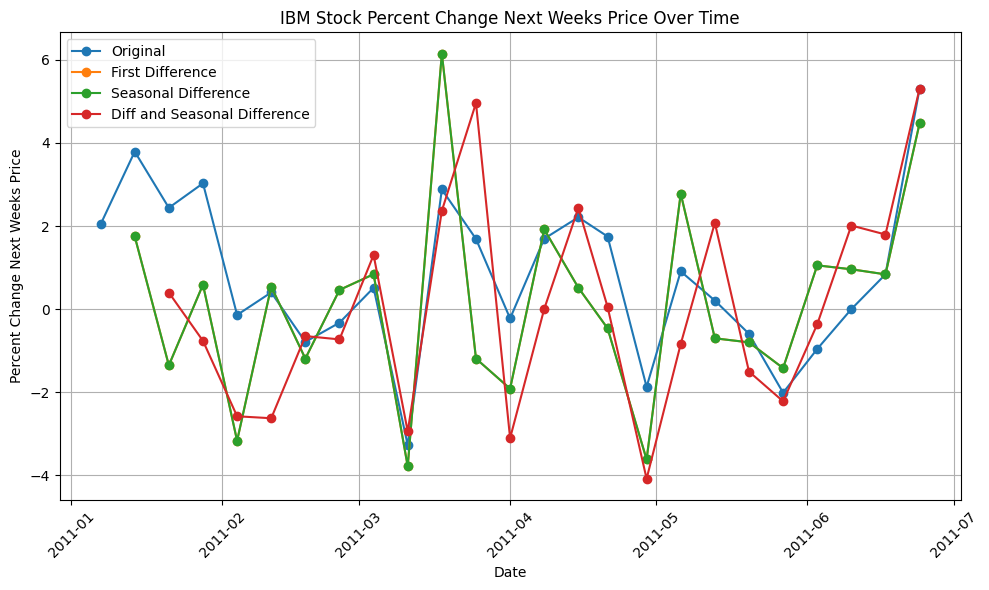

In [133]:
# Perform one difference
ibm_data['diff_percent_change'] = ibm_data['percent_change_next_weeks_price'].diff()

# Perform seasonal difference (weekly seasonality)
ibm_data['seasonal_diff_percent_change'] = ibm_data['percent_change_next_weeks_price'].diff(periods=1)

ibm_data['diss_and_seasonal_diff_percent_change'] = ibm_data['percent_change_next_weeks_price'].diff(periods=2)

# Plot original series, series with one difference, and series with one seasonal difference
plt.figure(figsize=(10, 6))
plt.plot(ibm_data['date'], ibm_data['percent_change_next_weeks_price'], label='Original', marker='o', linestyle='-')
plt.plot(ibm_data['date'], ibm_data['diff_percent_change'], label='First Difference', marker='o', linestyle='-')
plt.plot(ibm_data['date'], ibm_data['seasonal_diff_percent_change'], label='Seasonal Difference', marker='o', linestyle='-')
plt.plot(ibm_data['date'], ibm_data['diss_and_seasonal_diff_percent_change'], label='Diff and Seasonal Difference', marker='o', linestyle='-')

plt.title('IBM Stock Percent Change Next Weeks Price Over Time')
plt.xlabel('Date')
plt.ylabel('Percent Change Next Weeks Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusions: 1 difference provides the same results as 1 seasonal difference.
Interpretation: When one difference provides similar results as one seasonal difference, it suggests that the seasonality in the data is adequately captured by the simple differencing process, i.e., no need to do seasonal ARIMA.

Main Conclusion: No need to apply SARIMA. Apply ARIMA, it is the most adequate of them both.

## LSTM

Formulizing an idea for later (not the dates of the data, but that is not relevant to formulize the idea)
I want to predict the 01/04/2024:
 - Set X_train and y_train to be all days until 31/03/2024 
 - Set X_test and X_test to be 01/04/2024

 - percent_change_next_weeks_price will be the y, train for training dates and test for pred date 
 - X_train will be other variables, explanatory ones.


In [ ]:
#add here your modelling code

-----
*Add here your modelling results and conclusions (max. 200 words)*

-----

## Conclusions
In the conclusions, you should enumerate the results you got after completing the challenge.
* How good do you consider your results? 
* What are some factors that would contribute to get better results?
* What are some advantages and disadvantages of your solution?
* What can be done as future work to improve your results?


-----
*Add here your final conclusions (max. 400 words)*

-----

#### Feedback

-----
*Add here your thoughts and feedback regarding this challenge.*

-----

To submit your solution you should e-mail us this notebook in response to the e-mail you initially received with the challenge.